
# <h1 style="background-color:Pink;"> <font size="15"> <b> <font color='black'> <center> Movie Industry
    

## TABLE OF CONTENT
### <b> <a href='#chapter1'> I. Import and Data Pre-processing </a>

    

### <b> <a href='#chapter2'> II. Explore and Visualize </a> 

    
    
### <b> <a href='#chapter3'> III. Analysis Conclusion </a> 

    
### <b> <a href='#chapter3'> IV. Transform and Clean the data </a>
    
    
    
### <b> <a href='#chapter3'> V. Modelling - Revenue Prediction </a>

    

# I. Import and Data Pre-processing

### 1. Import Data


- Movie Industry

- Source: https://www.kaggle.com/danielgrijalvas/movies

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff

In [109]:
movies = pd.read_csv('/Users/dinhngocmai/Documents/Python Kurs/Final Projekt Movie Industry/movies.csv', encoding='latin1')

movies.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


[Content:](ufd0)

- budget: the budget of a movie. Some movies don't have this, so it appears as 0

- company: the production company

- country: country of origin

- director: the director

- genre: main genre of the movie.

- gross: revenue of the movie

- name: name of the movie

- rating: rating of the movie (R, PG, etc.)

- released: release date (YYYY-MM-DD)

- runtime: duration of the movie

- score: IMDb user rating

- votes: number of user votes

- star: main actor/actress

- writer: writer of the movie

- year: year of release

### 2. Data Pre-processing


In [110]:
#-Check dataset info by feature
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


[The set has:](udf_0)

- Numerical columns: Budget, Gross, Runtime, Score and Votes.
- Categorical columns: Company, Country, Director, Genre, Name, Rating, Star and Writer.
- Date columns: Released and Year.

In [111]:
#Checking basic statistical data by feature
movies.describe(include="all")

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
count,6.820000e+03,6820,6820,6820,6820,6.820000e+03,6820,6820,6820,6820.00000,6820.000000,6820,6.820000e+03,6820,6820.000000
unique,NaN,2179,57,2759,17,NaN,6731,13,2403,NaN,NaN,2504,NaN,4199,NaN
top,NaN,Universal Pictures,USA,Woody Allen,Comedy,NaN,Pulse,R,1991-10-04,NaN,NaN,Nicolas Cage,NaN,Woody Allen,NaN
freq,NaN,302,4872,33,2080,NaN,3,3392,10,NaN,NaN,42,NaN,32,NaN
mean,2.458113e+07,NaN,NaN,NaN,NaN,3.349783e+07,NaN,NaN,NaN,106.55132,6.374897,NaN,7.121952e+04,NaN,2001.000293
std,3.702254e+07,NaN,NaN,NaN,NaN,5.819760e+07,NaN,NaN,NaN,18.02818,1.003142,NaN,1.305176e+05,NaN,8.944501
min,0.000000e+00,NaN,NaN,NaN,NaN,7.000000e+01,NaN,NaN,NaN,50.00000,1.500000,NaN,2.700000e+01,NaN,1986.000000
25%,0.000000e+00,NaN,NaN,NaN,NaN,1.515839e+06,NaN,NaN,NaN,95.00000,5.800000,NaN,7.665250e+03,NaN,1993.000000
50%,1.100000e+07,NaN,NaN,NaN,NaN,1.213568e+07,NaN,NaN,NaN,102.00000,6.400000,NaN,2.589250e+04,NaN,2001.000000
75%,3.200000e+07,NaN,NaN,NaN,NaN,4.006534e+07,NaN,NaN,NaN,115.00000,7.100000,NaN,7.581225e+04,NaN,2009.000000


[Fazit:](ufd_0)

- Dataset has 6820 titles.
- The studied time lapse goes from 1986 to 2016.
- The average film duration is 1h 46min.
- Max.budget ist 3 Millions Dollar and max.Revenue ist over 9 Millions Dollar.
- There are 57 countries in the dataset. USA is the country, who has the best movie industry.
- There are 17 genres of movie. Comedy is the genre with the most released.

In [112]:
# Checking the existence of duplicated rows
movies.duplicated().sum()

0

In [113]:
# Checking the existence of zeros in rows
(movies==0).sum(axis=0)

budget      2182
company        0
country        0
director       0
genre          0
gross          0
name           0
rating         0
released       0
runtime        0
score          0
star           0
votes          0
writer         0
year           0
dtype: int64

[Fazit:](ufd_0)

- There are no missing values in our movie dataset.
- Only "budget" is zero in 2182 observations.


In [114]:
#Cleaning Data
# Replace zero 'budget' observations with 'budget' median
budget_avg = movies['budget'].median()
for index in range(0, len(movies)):
    if movies.budget[index] == 0:
        movies.loc[index, 'budget'] = budget_avg

In [115]:
#Create a feature (gross_to_budget_ratio) to analyze the revenue to budget ratio relevance
movies["gross_to_budget_ratio"] = movies["gross"] / movies["budget"]
#movies.head()

In [116]:
## Checking the existence of zeros in rows again
(movies==0).sum(axis=0)

budget                   0
company                  0
country                  0
director                 0
genre                    0
gross                    0
name                     0
rating                   0
released                 0
runtime                  0
score                    0
star                     0
votes                    0
writer                   0
year                     0
gross_to_budget_ratio    0
dtype: int64

In [1]:
# Country names in my dataset
country_data = list(movies['country'].unique())
country_data

NameError: name 'movies' is not defined

In [118]:
len(country_data)

57

In [119]:
# Changing country name 
movies['country'] = pd.DataFrame(movies['country'].replace({'West Germany':'Germany', 'Soviet Union': 'Russia'}))   

In [120]:
country_data = list(movies['country'].unique())
len(country_data)

55

# II. Data Exploration and Visualization


## 1. Exploration

In [121]:
for col in movies.columns:
    print(col, ':',len(movies[col].value_counts()))

budget : 350
company : 2179
country : 55
director : 2759
genre : 17
gross : 6802
name : 6731
rating : 13
released : 2403
runtime : 135
score : 75
star : 2504
votes : 6512
writer : 4199
year : 31
gross_to_budget_ratio : 6809


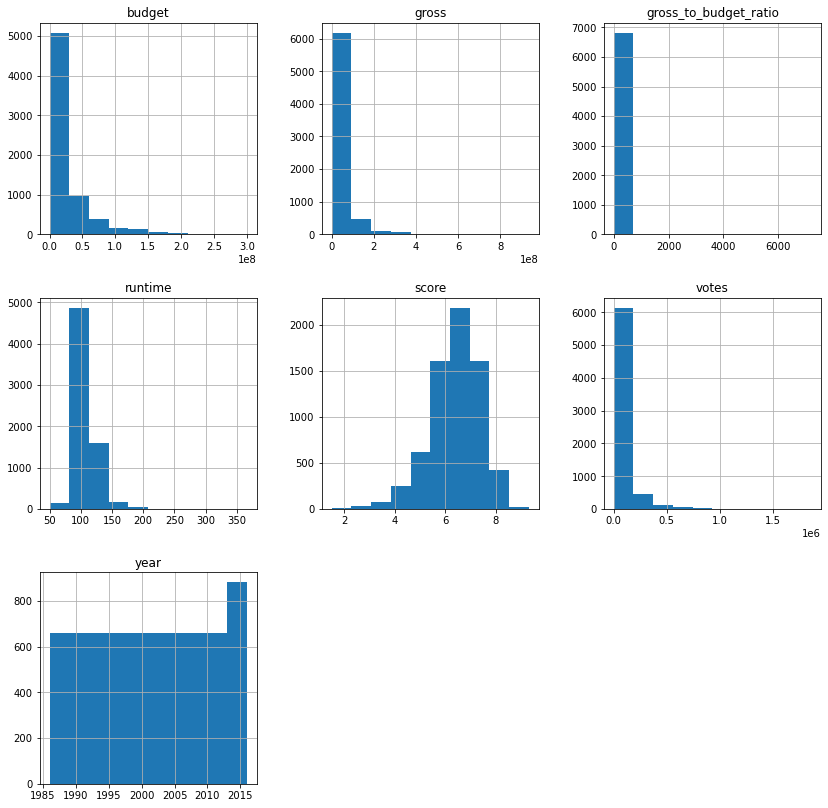

In [122]:
#Histogramm
movies.hist(figsize=(14,14))
plt.show()

In [123]:
# Categorical Data
category = [e for e in movies.columns if movies[e].dtypes == 'object']
#category

In [124]:
# Numerical data
numeric = [e for e in movies.columns if movies[e].dtypes == 'float' or movies[e].dtypes == 'int']
#numeric

In [125]:
# Feature's progress over consecutive time intervals (4 years)
movies1 = movies.copy()
for i in range(1980, 2020, 4):
    movies1.loc[(movies1['year'] > i) & (movies1['year'] <= (i + 4)), 'year'] = i + 4

In [126]:
# Categorical Features
for i in range(0, len(category)):
    print("Progress of '%s' over time:\n" % category[i])
    for year in movies1.year.unique():
        print('Total unique %s in the interval ending in %i is: %i' 
              % (category[i], year, movies1[movies1['year'] == year][category[i]].nunique()))
    print('\n')

Progress of 'company' over time:

Total unique company in the interval ending in 1988 is: 305
Total unique company in the interval ending in 1992 is: 407
Total unique company in the interval ending in 1996 is: 349
Total unique company in the interval ending in 2000 is: 405
Total unique company in the interval ending in 2004 is: 357
Total unique company in the interval ending in 2008 is: 344
Total unique company in the interval ending in 2012 is: 384
Total unique company in the interval ending in 2016 is: 469


Progress of 'country' over time:

Total unique country in the interval ending in 1988 is: 19
Total unique country in the interval ending in 1992 is: 28
Total unique country in the interval ending in 1996 is: 29
Total unique country in the interval ending in 2000 is: 32
Total unique country in the interval ending in 2004 is: 31
Total unique country in the interval ending in 2008 is: 30
Total unique country in the interval ending in 2012 is: 32
Total unique country in the interval 

[Kết luận:](ufd_0)

- The number of companies and countries producing movies is increasing over time.
- The number of Directors has also risen over the years.
- Movie genres are narrowed down. (from 16 to 14)
- he number of lead actors/actresses (stars) for each time period did not change significantly.
- The number of ratings in each time period is nearly consistent.

In [127]:
## Numerical Features (Million)
numeric1 = ['budget', 'gross', 'votes']
for i in range(0, len(numeric1)):
    print("Progress of '%s' over time:\n" % numeric1[i])
    for year in movies1.year.unique():
        print('The sum of %s in the interval ending in %i is: %i million'
              % (numeric1[i], year, movies1[movies1['year'] == year][numeric1[i]].sum() / 1000000))    
    print('\n')


Progress of 'budget' over time:

The sum of budget in the interval ending in 1988 is: 7823 million
The sum of budget in the interval ending in 1992 is: 12972 million
The sum of budget in the interval ending in 1996 is: 16959 million
The sum of budget in the interval ending in 2000 is: 26245 million
The sum of budget in the interval ending in 2004 is: 28947 million
The sum of budget in the interval ending in 2008 is: 31041 million
The sum of budget in the interval ending in 2012 is: 33427 million
The sum of budget in the interval ending in 2016 is: 34228 million


Progress of 'gross' over time:

The sum of gross in the interval ending in 1988 is: 10079 million
The sum of gross in the interval ending in 1992 is: 17509 million
The sum of gross in the interval ending in 1996 is: 20924 million
The sum of gross in the interval ending in 2000 is: 27219 million
The sum of gross in the interval ending in 2004 is: 34399 million
The sum of gross in the interval ending in 2008 is: 36059 million
Th

[Fazit:](ufd_0)

- Total budget (budget) and profit (gross) has grown by several million dollars over time.
- The number of user votes increased significantly until the last period (2012-2016) it started to decrease.'

In [128]:
## Numerical Features
avg = ['score', 'runtime']
for i in range(0, len(avg)):
    print("Progress of '%s' over time:\n" % avg[i])
    for year in movies1.year.unique():
        print('%s median in the interval ending in %i is: %i' 
              % (avg[i], year, movies1[movies1['year'] == year][avg[i]].median()))
    print('\n')

Progress of 'score' over time:

score median in the interval ending in 1988 is: 6
score median in the interval ending in 1992 is: 6
score median in the interval ending in 1996 is: 6
score median in the interval ending in 2000 is: 6
score median in the interval ending in 2004 is: 6
score median in the interval ending in 2008 is: 6
score median in the interval ending in 2012 is: 6
score median in the interval ending in 2016 is: 6


Progress of 'runtime' over time:

runtime median in the interval ending in 1988 is: 100
runtime median in the interval ending in 1992 is: 101
runtime median in the interval ending in 1996 is: 102
runtime median in the interval ending in 2000 is: 103
runtime median in the interval ending in 2004 is: 102
runtime median in the interval ending in 2008 is: 104
runtime median in the interval ending in 2012 is: 102
runtime median in the interval ending in 2016 is: 106




[Kết luận:](ufd_0)

- The average length of the movie increased slightly.
- The score for movies was stable interval.

No handles with labels found to put in legend.


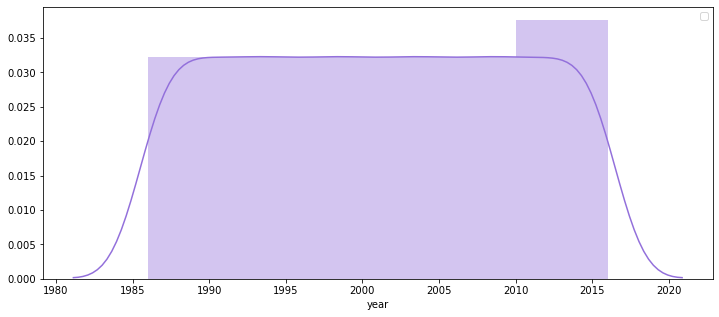

In [129]:
sns.distplot(movies['year'], bins = 5, color = 'mediumpurple')
plt.legend()
plt.gcf().set_size_inches(12, 5)

[Fazit:](ufd0)
- The number of movies per year in this dataset is the same.

## 2. Visualization

## Relationship between Budget and Revenue

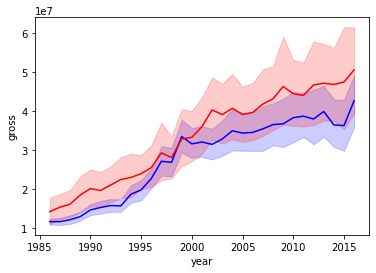

In [130]:
#Line Chart
sns.lineplot(movies['year'], movies['budget'], color = 'blue')
sns.lineplot(movies['year'], movies['gross'], color = 'red')

[Fazit:](ufd_0)

- Budget and Gross are related. As the budget increases, so does the profit.

- Band outside the linechart is std (Standard deviation - standard deviation). The standard deviation gets bigger and bigger, indicating that movies are increasingly divided in budget.

## Relationship of Countries, Movies released and Revenue

In [131]:
# Top 5 Oldest released movies
Oldest = movies.sort_values("released", ascending = True)
Oldest[['name','country', "released"]][:5]

,name,country,released
96,Black Moon Rising,USA,1986-01-10
195,The Longshot,USA,1986-01-17
47,Troll,USA,1986-01-17
27,Iron Eagle,USA,1986-01-17
218,Heathcliff: The Movie,Canada,1986-01-17


In [132]:
# Top 5 Newest released movies
Newest = movies.sort_values("released", ascending = False)
Newest[['name','country', "released"]][:5]

,name,country,released
6545,Manifesto,Germany,2017-11-23
6651,Leap!,France,2017-08-25
6744,Maudie,Ireland,2017-08-04
6668,Paris Can Wait,Japan,2017-08-03
6819,From the Land of the Moon,France,2017-07-28


In [133]:
countries = pd.DataFrame(movies['country'].value_counts())
df_country_gross = movies.groupby(['country'])[["gross"]].sum()
df_country_released_gross = pd.concat([countries, df_country_gross], axis=1)
df_country_released_gross.reset_index(drop=False,inplace=True)
df_country_released_gross = df_country_released_gross.head(5)
df_country_released_gross

,index,country,gross
0,USA,4872,1.979349e+11
1,UK,698,1.420982e+10
2,France,283,3.037067e+09
3,Canada,150,2.296115e+09
4,Germany,138,3.208771e+09


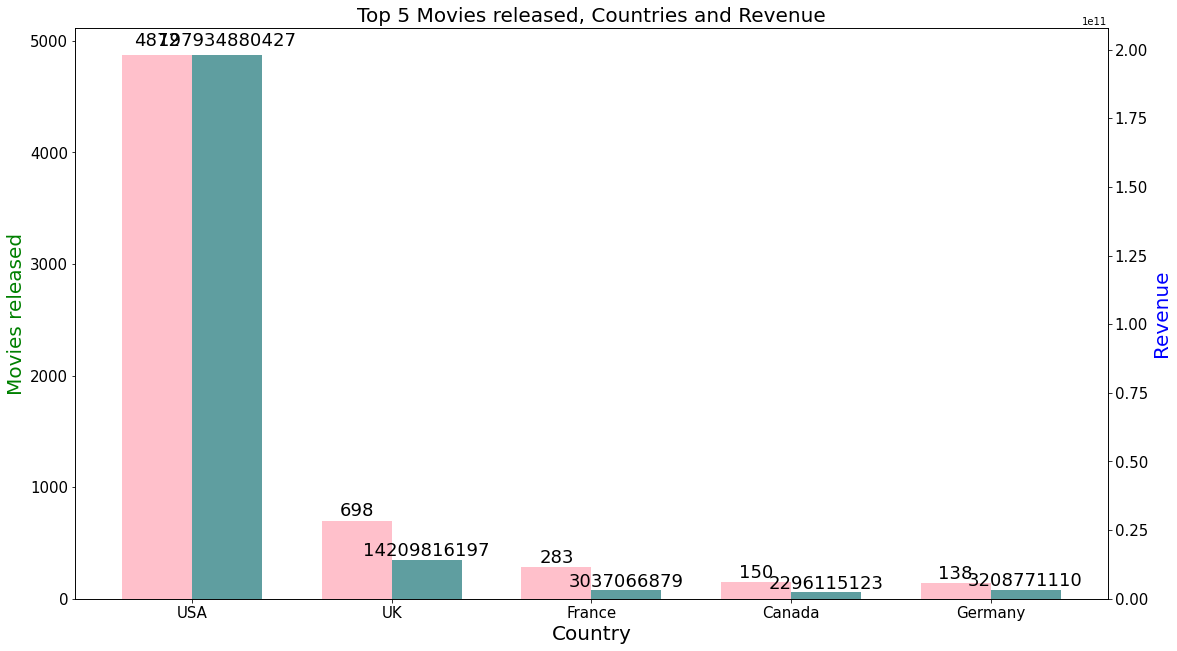

In [134]:
# Bar chart - Top 5 Countries with the highest Revenue and movies released
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ind = np.arange(len(df_country_released_gross))
barwidth = 0.35

img1 = ax1.bar(ind, df_country_released_gross["country"], width=barwidth, color="pink")

ax2 = ax1.twinx()
img2 = ax2.bar(ind + barwidth, df_country_released_gross["gross"], width=barwidth, color="cadetblue")

ax1.set_title("Top 5 Movies released, Countries and Revenue", fontsize=20)
ax1.set_xticks(ind + barwidth / 2)
ax1.set_xticklabels(df_country_released_gross["index"])

ax1.tick_params(axis="both", which="major", labelsize=15)
ax2.tick_params(axis="both", which="major", labelsize=15)
ax1.set_xlabel("Country", fontsize=20)
ax1.set_ylabel("Movies released", color="g", fontsize=20)
ax2.set_ylabel("Revenue", color="b", fontsize=20)

for rect in img1:
    height = rect.get_height()
    ax1.text(
        rect.get_x() + rect.get_width() / 2,
        1.01 * height,
        "%d" % int(height),
        ha="center",
        va="bottom",
        size=18,
    )

for rect in img2:
    height = rect.get_height()
    ax2.text(
        rect.get_x() + rect.get_width() / 2,
        1.01 * height,
        "%d" % int(height),
        ha="center",
        va="bottom",
        size=18,
    )

plt.show()

[Fazit:](ufd_0)

1. The more Movies released in the country, the higher the profit, typically the USA.

2. But that is not always the case for all countries:
    
    - France and Canada are the 3rd and 4th largest film production countries, but its profit is behind Germany - the 5th largest country in terms of film production.

## Relationship of Companies, Movies released and Revenue

In [135]:
movies.groupby('company').size()

company
"DIA" Productions GmbH & Co. KG    1
1+2 Seisaku Iinkai                 1
101st Street Films                 1
10th Hole Productions              1
120 Films                          1
                                  ..
Zucker Brothers Productions        1
double A Films                     1
erbp                               1
i5 Films                           1
micro_scope                        1
Length: 2179, dtype: int64

- There are 2179 different companies.

In [136]:
companies = pd.DataFrame(movies['company'].value_counts())
df_company_gross = movies.groupby(['company'])[["gross"]].sum()
df_company_released_gross = pd.concat([companies, df_company_gross], axis=1)
df_company_released_gross.reset_index(drop=False,inplace=True)
df_company_released_gross = df_company_released_gross.head(5)
df_company_released_gross

,index,company,gross
0,Universal Pictures,302,1.943005e+10
1,Warner Bros.,294,2.132232e+10
2,Paramount Pictures,259,1.711570e+10
3,Twentieth Century Fox Film Corporation,205,1.478857e+10
4,New Line Cinema,172,8.540112e+09


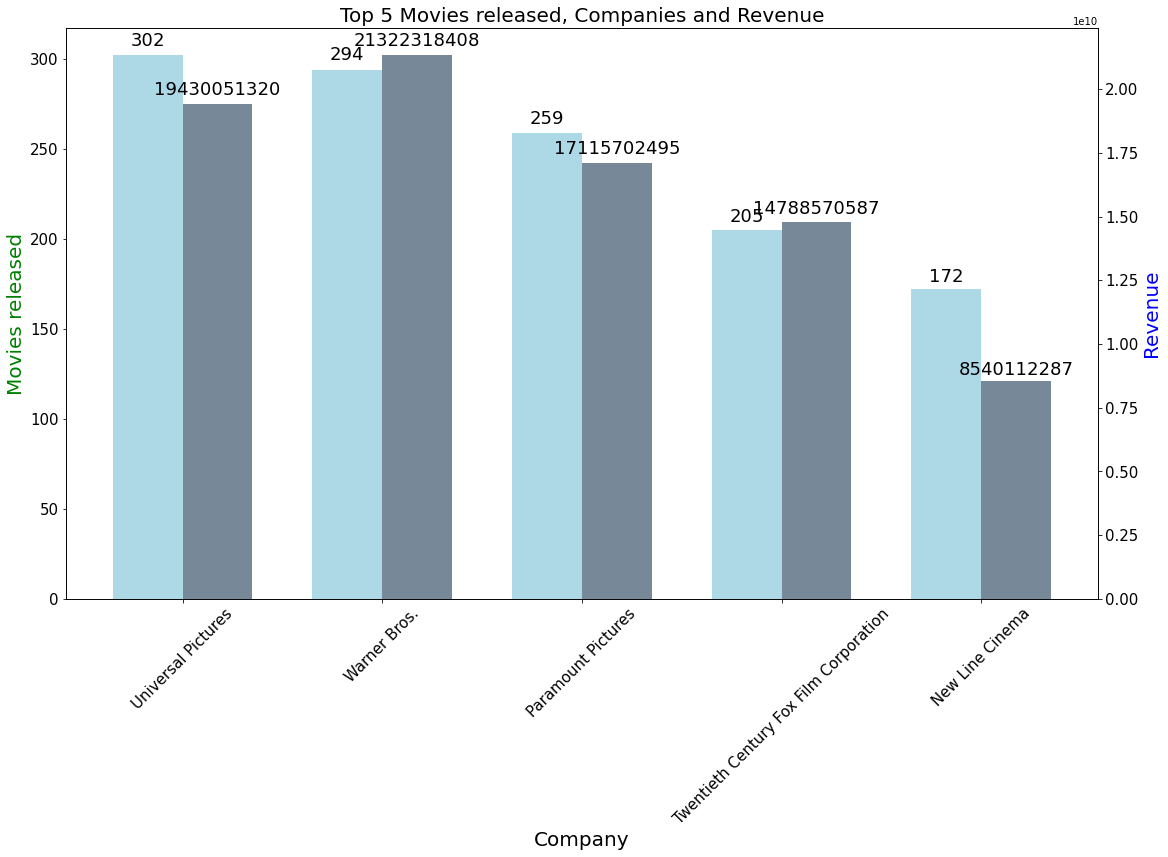

In [137]:
# Bar chart - Top 5 Company with the highest Revenue and movies released
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ind = np.arange(len(df_company_released_gross))
barwidth = 0.35

img1 = ax1.bar(ind, df_company_released_gross["company"], width=barwidth, color="lightblue")

ax2 = ax1.twinx()
img2 = ax2.bar(ind + barwidth, df_company_released_gross["gross"], width=barwidth, color="lightslategray")

ax1.set_title("Top 5 Movies released, Companies and Revenue", fontsize=20)
ax1.set_xticks(ind + barwidth / 2)
ax1.set_xticklabels(df_company_released_gross["index"], rotation = '45')

ax1.tick_params(axis="both", which="major", labelsize=15)
ax2.tick_params(axis="both", which="major", labelsize=15)
ax1.set_xlabel("Company", fontsize=20, rotation = '360')
ax1.set_ylabel("Movies released", color="g", fontsize=20)
ax2.set_ylabel("Revenue", color="b", fontsize=20)

for rect in img1:
    height = rect.get_height()
    ax1.text(
        rect.get_x() + rect.get_width() / 2,
        1.01 * height,
        "%d" % int(height),
        ha="center",
        va="bottom",
        size=18,
    )

for rect in img2:
    height = rect.get_height()
    ax2.text(
        rect.get_x() + rect.get_width() / 2,
        1.01 * height,
        "%d" % int(height),
        ha="center",
        va="bottom",
        size=18,
    )

plt.show()

[Fazit:](ufd_0)

- In general, the number of films produced and the profit earned are directly proportional.
The more movies a company produces, the more profit it makes.

- But there's something a little unusual at Universal Pictures and Warner Bros. Universal Pictures produced more films, but Warner Bros. made more profits.

- All Top 5 Most Profitable Companies are American companies.

## Relationship between Genre and Revenue

In [138]:
genre = pd.DataFrame(movies['genre'].value_counts())
df_genre_gross = movies.groupby(['genre'])[["gross"]].sum()
df_genre_released_gross = pd.concat([genre, df_genre_gross], axis=1)
df_genre_released_gross.reset_index(drop=False,inplace=True)
df_genre_released_gross

,index,genre,gross
0,Comedy,2080,5.354342e+10
1,Drama,1444,2.520462e+10
2,Action,1331,7.479263e+10
3,Crime,522,1.021784e+10
4,Adventure,392,2.089509e+10
5,Biography,359,8.617527e+09
6,Animation,277,2.534220e+10
7,Horror,277,7.117847e+09
8,Mystery,38,1.379952e+09
9,Fantasy,32,6.446531e+08


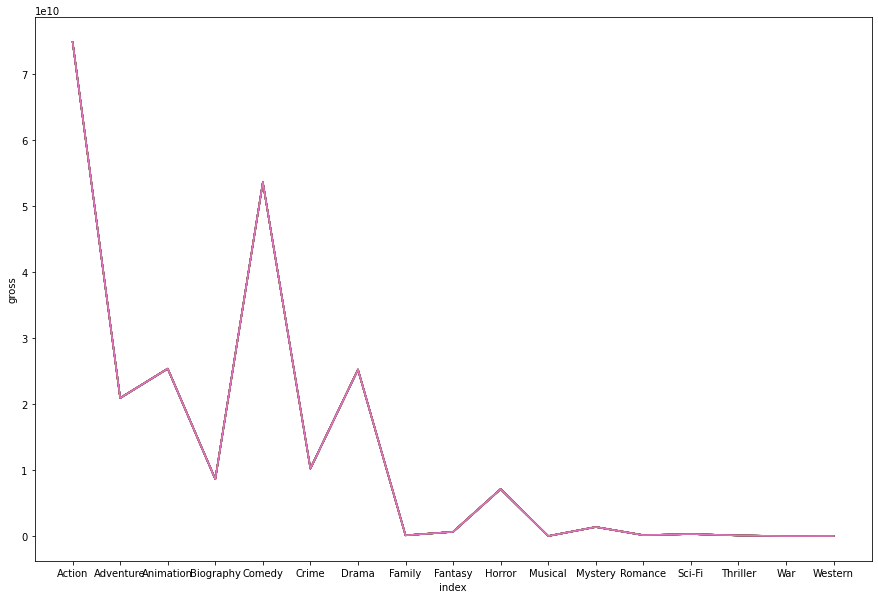

In [139]:
#Line Chart
fig, ax = plt.subplots(figsize=[15, 10])

for i in df_genre_released_gross["genre"]:
    sns.lineplot(
        x=df_genre_released_gross["index"], 
        y=df_genre_released_gross["gross"]
    )

[Fazit:](ufd_0)

- There are 17 film genres produced in all.

- Action genre brings the highest profit.

In [140]:
# Genre vs Movies released
genre1 = pd.DataFrame(movies['genre'].value_counts())
genre1.reset_index(drop=False,inplace=True)

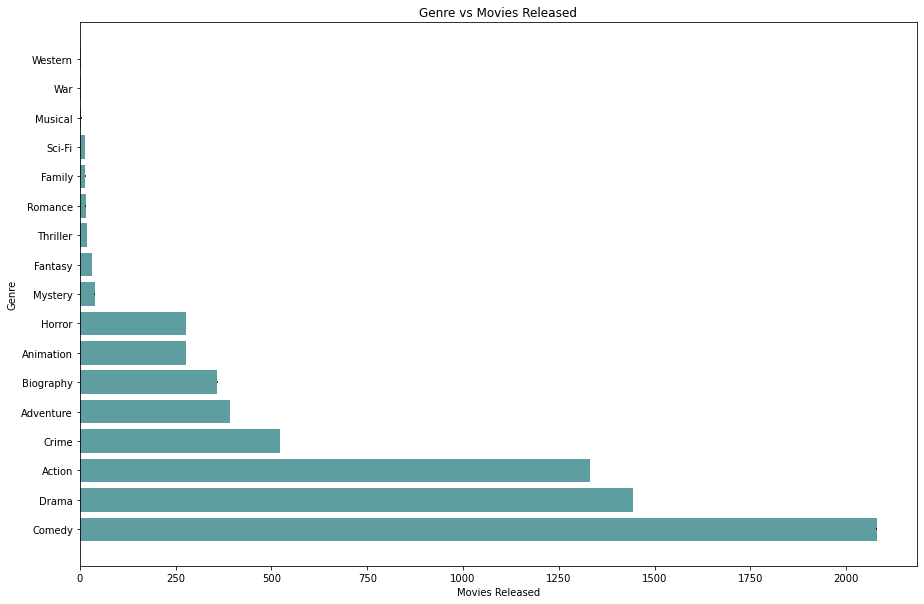

In [141]:
# Bar chart
fig, ax = plt.subplots(figsize=[15, 10])

y_pos = genre1['index']
released = genre1['genre']
error = np.random.rand(len(genre1))

plt.barh(y_pos, released, xerr=error, color='cadetblue')
plt.ylabel('Genre')
plt.xlabel('Movies Released')
plt.title('Genre vs Movies Released')

plt.show()

[Fazit:](ufd_0)

- Although the Action genre is the most profitable, the Comedy and Drama genres are more produced.

- Comedy is the most produced film genre.

## Relationship between Rating và Revenue

In [142]:
rating = pd.DataFrame(movies['rating'].value_counts())
rating_revenue = pd.DataFrame(movies.groupby(['rating'])['gross'].sum())

df_rating_revenue = pd.concat([rating, rating_revenue], axis=1)
df_rating_revenue.reset_index(drop=False,inplace=True)
df_rating_revenue

,index,rating,gross
0,R,3392,6.758802e+10
1,PG-13,1995,1.036586e+11
2,PG,951,4.764933e+10
3,NOT RATED,174,9.508908e+07
4,G,147,9.226493e+09
5,UNRATED,71,7.499006e+07
6,Not specified,63,8.562490e+07
7,NC-17,22,7.465816e+07
8,TV-PG,1,1.642436e+06
9,B15,1,2.083800e+04


[(Internet Movie Database) - Cơ ở dữ liệu điện ảnh trên Internet:](ufd_0)

- G (General Audiences): Phim cho phép phổ biến rộng rãi.

- PG (Parental Guidance suggested): Có thể không thích hợp với trẻ em.

- PG-13 (Parents Strongly Cautioned): Không nên dành cho trẻ dưới 13 tuổi.
    
- R (Restricted): Dưới 17 tuổi phải có cha mẹ hoặc người lớn đi cùng.
    
- NC-17: Không dành cho người vị thành niên.
    
- not rated / unrated/ not specifield: một bộ phim lưu hành mà chưa được phân loại.
    
- TV-14: Dành cho tuổi Teens.
                                                                            
- TV-MA: Dành cho người lớn (Adult).
                                                                            
- TV-PG: Dành cho con nít (Kids).
                                                                            
- B: Không dành cho trẻ em dưới 12 tuổi. 
                                                                            
- B15: Chỉ dành cho người từ 15 tuổi trở lên.

In [143]:
df_rating_revenue.sort_values(by = 'gross', ascending=False,inplace=True  )

#df_rating_revenue

In [144]:
df_rating_unrated = df_rating_revenue[4:7]

df_rating_unrated.sum(axis=0).values[1:]

df_rating_unrated.sum(axis=0).index[1:]

df_unrated =  pd.DataFrame(dict(zip(df_rating_unrated.sum(axis=0).index[1:], df_rating_unrated.sum(axis=0).values[1:])),index=[0])
df_unrated['index'] = 'unrated'
#df_unrated

In [145]:
df_rating_other = df_rating_revenue[7:14]

df_rating_other.sum(axis=0).values[1:]

df_rating_other.sum(axis=0).index[1:]

df_other =  pd.DataFrame(dict(zip(df_rating_other.sum(axis=0).index[1:], df_rating_other.sum(axis=0).values[1:])),index=[0])
df_other['index'] = 'other'
#df_other

In [146]:
df_main = df_rating_revenue[0:4]
#df_rating_main['index'] = 'index'
#df_main

In [147]:
df_rating=df_main.append(df_other)
df_rating=df_rating.append(df_unrated)
#df_rating

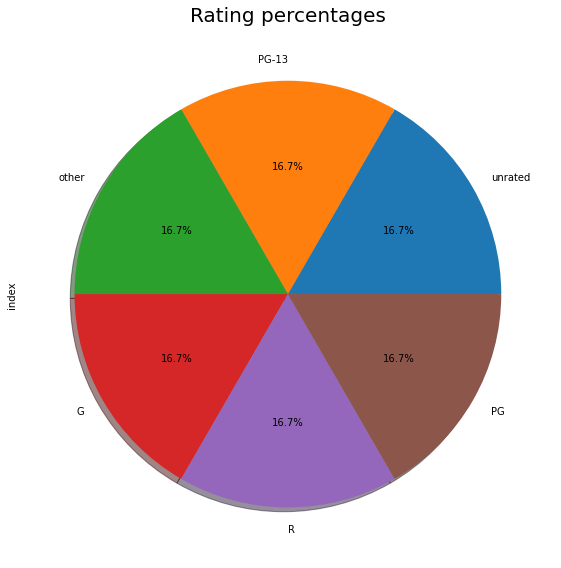

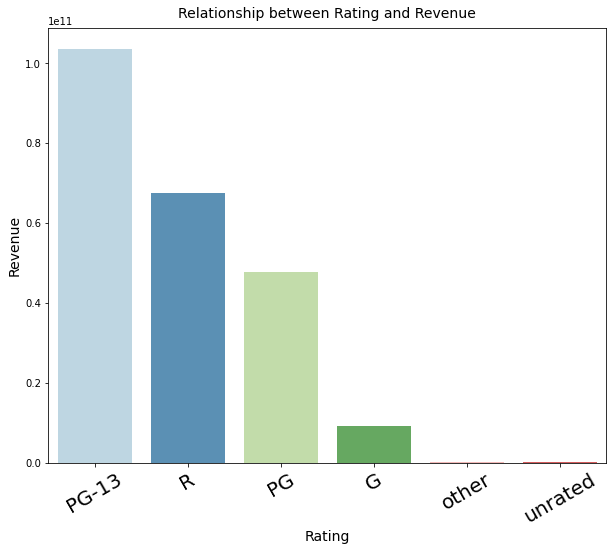

In [148]:
# Pie chart
df_rating['index'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title('Rating percentages', fontsize = 20)
plt.tight_layout()
plt.show()

# Bar Chart
plt.figure(figsize=(10, 8))
sns.barplot(x=df_rating['index'], y=df_rating['gross'], alpha=0.8 , palette='Paired')
plt.title('Relationship between Rating and Revenue', fontsize=14, pad=10)
plt.ylabel('Revenue', fontsize=14)
plt.xlabel('Rating', fontsize=14)
plt.xticks(fontsize=20, rotation=30)
plt.yticks(fontsize=10)
plt.show()

[Fazit:](ufd_0)

- The ratings are pretty much the same.

- Movies with Ratings of 13+ (PG-13), 17+ (R) and PG (may not be suitable for children) earned the highest profits.


##  Relationship between Genre and Rating

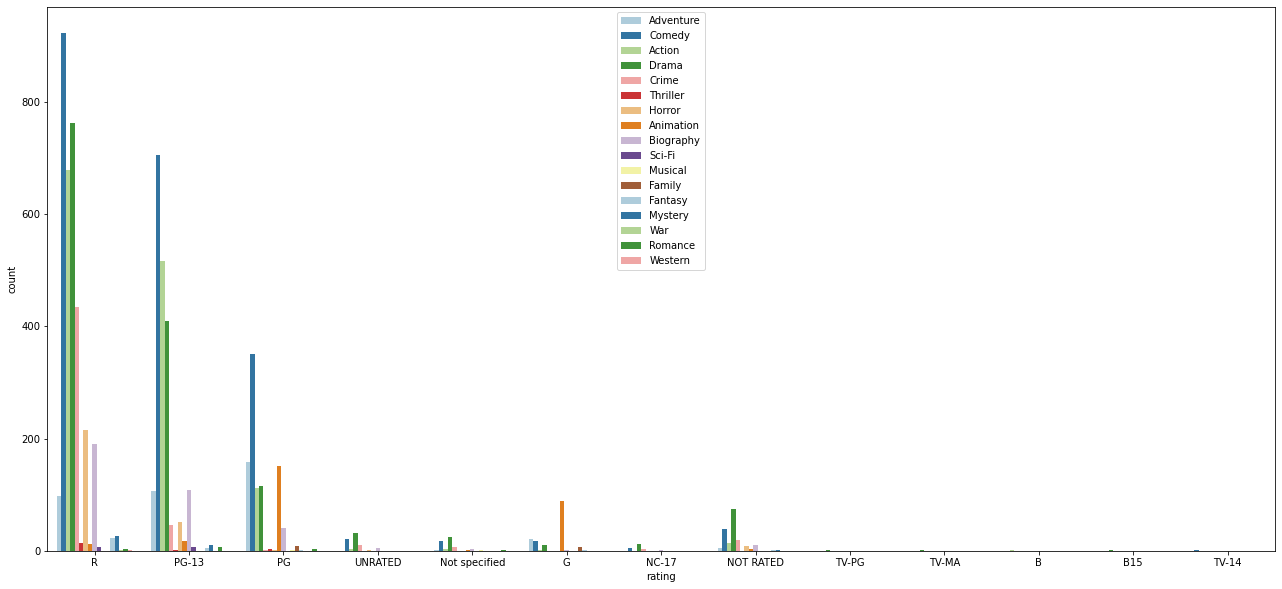

In [149]:
plt.figure(figsize = (22,10))
sns.countplot(x = 'rating',data = movies, hue='genre', palette='Paired')
plt.legend(loc='upper center')
plt.show()

[Fazit:](ufd_0)

- We can see that most of the movies are rated R and PG-13. Most of the movies are in Comedy, Action, Drama and Adventure genres. Those are the movie genres that are produced the most and also bring in the highest revenue.

- The movies rated G are mainly Animation - children's animation, which is widely popular.

## Relationship of Vote and Revenue bzw. Score and Revenue

In [150]:
movies.iloc[:,[5,10,12]]

,gross,score,votes
0,52287414.0,8.1,299174
1,70136369.0,7.8,264740
2,179800601.0,6.9,236909
3,85160248.0,8.4,540152
4,18564613.0,6.9,36636
...,...,...,...
6815,4750497.0,5.4,9161
6816,28368.0,4.9,1959
6817,3775000.0,6.5,36333
6818,25981.0,6.2,6947


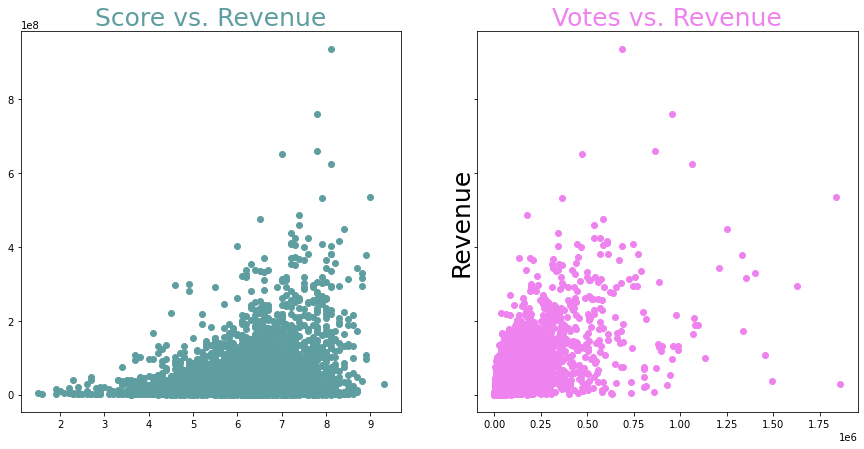

In [151]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

plt.gcf().set_size_inches(15, 7)
ax1.scatter(movies.score, movies.gross, c = 'cadetblue')
ax1.set_title('Score vs. Revenue', c = 'cadetblue', fontsize = 25)
ax2.scatter(movies.votes, movies.gross, c='violet')
ax2.set_title('Votes vs. Revenue', c ='violet', fontsize = 25)

plt.ylabel('Revenue', fontsize = 25)

plt.show()

[Fazit:](ufd_0)

- In general, Score and Revenue as well as Vote and Revenue are proportional to each other.

- Movies with a high Score are highly profitable, but that's not always the case. Looking at the chart above, we will see that there are exceptions, like a very high score (> 9) but a very low revenue.

- However, looking at the chart above, we see that there are movies with a lot of votes but low profits, there are also movies with large profits but not high votes.

# III. Analysis Conclusion:


- To answer a question: "Is the film industry struggling and going down?"
From the above analysis we can see that the film industry is still growing, the numbers and charts show that all features are exploding at different rates over time.
- The US is the most developed country and then the UK in terms of the number of films produced and the profit earned.
- The most popular movie genres are Action, Comedy and Drama. Therefore, these are also the types of movies that are focused on exploiting the most.
- Profit earned after each movie is affected by many factors. Detail:
    The higher the budget, the higher the profit earned.
    - The more new movies are released in a country, the greater the profit will be.
    - Focusing on exploiting movie genres that are loved by many audiences is also a way to earn huge profits.
    - The number of audience votes and the number of points for each film are related to the revenue. However, many movies are highly voted or have high scores, but the profits are not great.

# IV. Transform and clean the data

In [152]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, DBSCAN, SpectralClustering

## Check and Handle Outliers

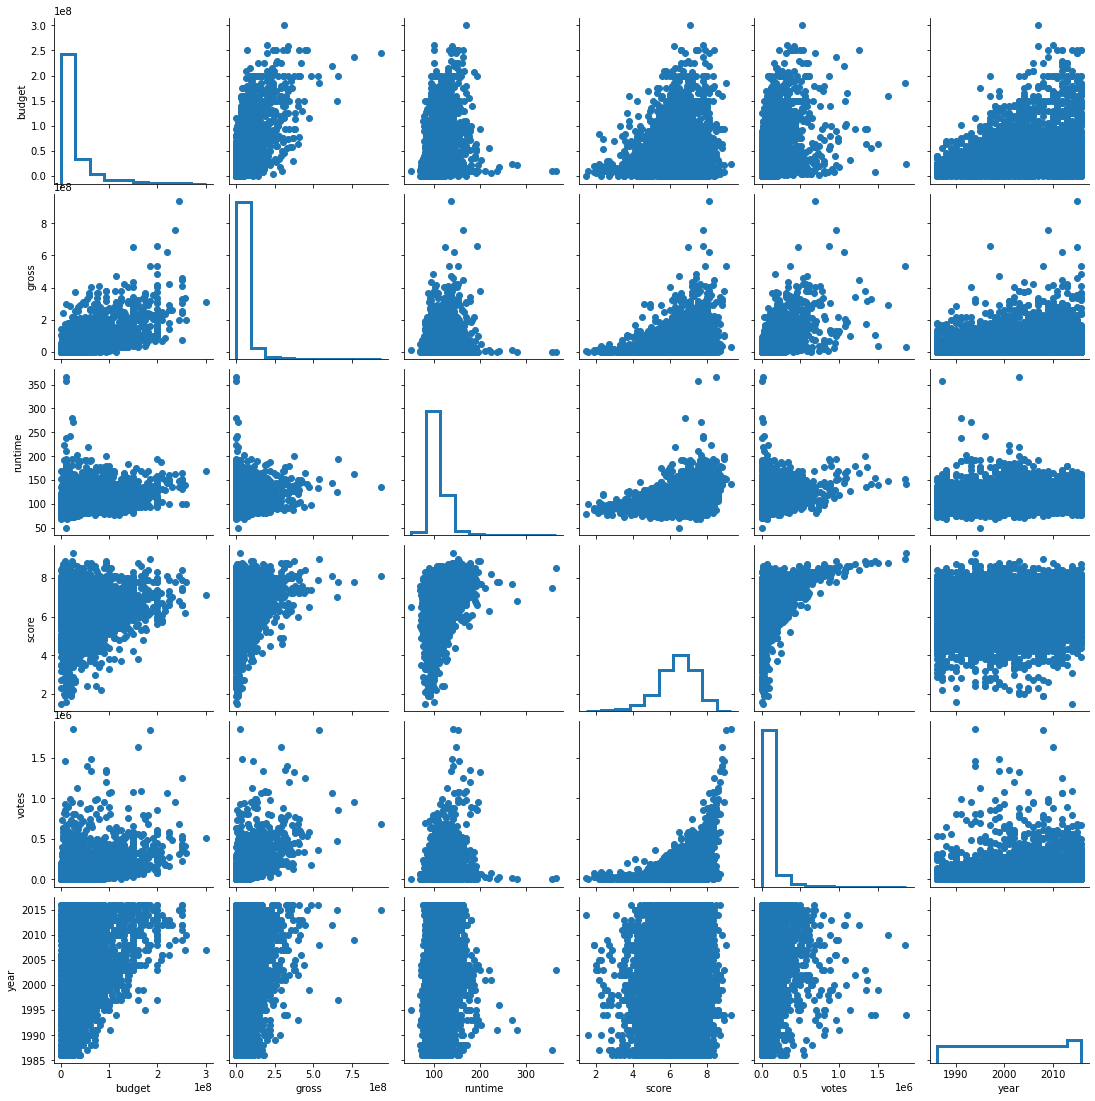

In [153]:
g = sns.PairGrid(movies.loc[:,["budget","gross","runtime","score","votes","year"]])
g.map_diag(plt.hist, histtype="step", linewidth=3)
g.map_offdiag(plt.scatter)


[Fazit:](ufd0)

- Different groups are not observed in different variables

- Only each Year is without Outliers.

In [154]:
movies1 = movies.copy()

import scipy.stats

def handle_outlier(movies1,column):
    # first quantile/percentile
    first_qrt = np.quantile(movies1[column],0.25)
    # third quantile/percentile
    third_qrt = np.quantile(movies1[column],0.75)

    lower_whisker = first_qrt - (third_qrt -first_qrt )*1.5
    upper_whisker = third_qrt + (third_qrt -first_qrt )*1.5
  
    df_lower = movies1.loc[(movies1[column] < lower_whisker)] 
    df_upper = movies1.loc[(movies1[column] > upper_whisker)]
    
    movies1[column]= scipy.stats.mstats.winsorize(movies1[column],limits = [len(df_lower)/len(movies1),len(df_upper)/len(movies1)])

In [155]:
for col in numeric:
    handle_outlier(movies1,col)

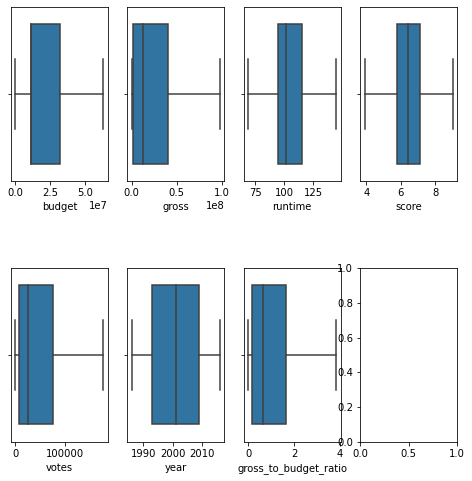

In [156]:
fig,axes = plt.subplots(2,4,figsize=(8,8))
for index,col in enumerate(numeric):
    x,y = index//4,index%4
    sns.boxplot(movies1[col],ax=axes[x,y])

plt.subplots_adjust(hspace=0.5)

## Encoding

In [157]:
movies_ds = movies1[["budget", "country", "genre", "gross", "rating", "runtime", "score", "year", "gross_to_budget_ratio"]]
#movies_ds

In [158]:
onehot_dt = pd.get_dummies(movies_ds)
onehot_dt

,budget,gross,runtime,score,year,gross_to_budget_ratio,country_Argentina,country_Aruba,country_Australia,country_Austria,...,rating_NC-17,rating_NOT RATED,rating_Not specified,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-MA,rating_TV-PG,rating_UNRATED
0,8000000.0,52287414.0,89,8.1,1986,3.843055,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6000000.0,70136369.0,103,7.8,1986,3.843055,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,15000000.0,97822171.0,110,6.9,1986,3.843055,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,18500000.0,85160248.0,137,8.4,1986,3.843055,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9000000.0,18564613.0,90,6.9,1986,2.062735,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,11000000.0,4750497.0,91,5.4,2016,0.431863,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6816,11000000.0,28368.0,90,4.9,2016,0.002579,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6817,3500000.0,3775000.0,76,6.5,2016,1.078571,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6818,11000000.0,25981.0,76,6.2,2016,0.002362,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Features Selection

In [159]:
corrMatrix = movies.corr()
corrMatrix

,budget,gross,runtime,score,votes,year,gross_to_budget_ratio
budget,1.000000,0.707457,0.271460,0.048560,0.493156,0.272353,-0.016115
gross,0.707457,1.000000,0.224579,0.165693,0.662457,0.191548,0.028759
runtime,0.271460,0.224579,1.000000,0.395343,0.317399,0.087639,-0.021892
score,0.048560,0.165693,0.395343,1.000000,0.393607,0.105276,0.001878
votes,0.493156,0.662457,0.317399,0.393607,1.000000,0.229304,0.019610
year,0.272353,0.191548,0.087639,0.105276,0.229304,1.000000,0.006096
gross_to_budget_ratio,-0.016115,0.028759,-0.021892,0.001878,0.019610,0.006096,1.000000


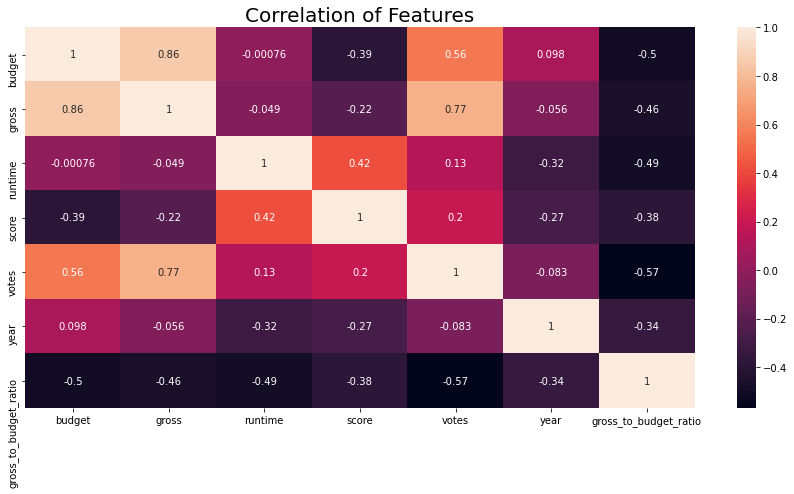

In [160]:
#Identify correlation among variables
plt.figure(figsize=(15,12))
plt.title('Correlation of Features', fontsize=20)
sns.heatmap(movies.corr().astype(float).corr(),vmax=1.0, annot=True)
plt.gcf().set_size_inches(15, 7)
plt.show()

[Fazit:](ufd0)

- There is a clear correlation between "Budget" and "Gross", as well as a relationship between the variables "Vote" and "Gross".

In [161]:
#Identify the P-value
target = onehot_dt['gross'].values 
variables = onehot_dt.drop(columns = {'gross'}).values 
target


array([5.2287414e+07, 7.0136369e+07, 9.7822171e+07, ..., 3.7750000e+06,
       2.5981000e+04, 3.7757000e+04])

In [162]:
import statsmodels.api as sm
mod = sm.OLS(target,variables)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

x1     0.000000e+00
x2     4.528568e-05
x3     6.167186e-26
x4     6.236850e-05
x5     0.000000e+00
           ...     
x86    4.682053e-07
x87    3.231534e-05
x88    8.574124e-05
x89    7.218072e-05
x90    6.273575e-07
Name: P>|t|, Length: 90, dtype: float64

In [163]:
mod = sm.OLS(target,variables)
fii = mod.fit()
fii.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
x1,1.052332e+00,1.126742e-02,93.396033,0.000000e+00,1.030245e+00,1.074420e+00
x2,5.664467e+04,1.387878e+04,4.081386,4.528568e-05,2.943786e+04,8.385147e+04
x3,2.229047e+06,2.107710e+05,10.575683,6.167186e-26,1.815869e+06,2.642225e+06
x4,7.910076e+04,1.974459e+04,4.006199,6.236850e-05,4.039511e+04,1.178064e+05
x5,1.517319e+07,1.544592e+05,98.234237,0.000000e+00,1.487040e+07,1.547597e+07
...,...,...,...,...,...,...
x86,-9.999335e+07,1.982482e+07,-5.043847,4.682053e-07,-1.388563e+08,-6.113043e+07
x87,-9.952867e+07,2.392903e+07,-4.159328,3.231534e-05,-1.464371e+08,-5.262020e+07
x88,-9.256025e+07,2.355129e+07,-3.930156,8.574124e-05,-1.387282e+08,-4.639226e+07
x89,-9.323178e+07,2.347549e+07,-3.971451,7.218072e-05,-1.392512e+08,-4.721238e+07


In [164]:
# p-value: calculation:
var_pvalue = p_values[(p_values <= 0.05)]
var_pvalue

x1     0.000000e+00
x2     4.528568e-05
x3     6.167186e-26
x4     6.236850e-05
x5     0.000000e+00
           ...     
x86    4.682053e-07
x87    3.231534e-05
x88    8.574124e-05
x89    7.218072e-05
x90    6.273575e-07
Name: P>|t|, Length: 77, dtype: float64

## The effect of the independent variables on the dependent variables

In [165]:
num_col = [col for col in movies_ds.columns if movies_ds[col].dtype != 'object']
num_col

['budget', 'gross', 'runtime', 'score', 'year', 'gross_to_budget_ratio']

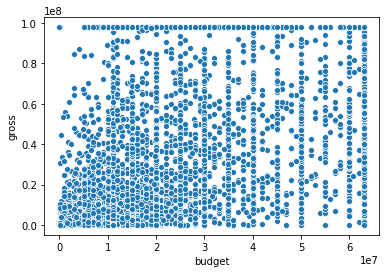

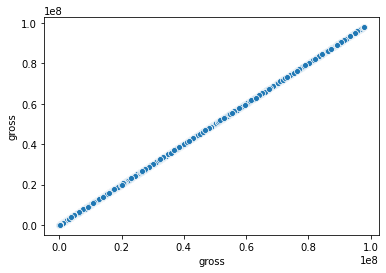

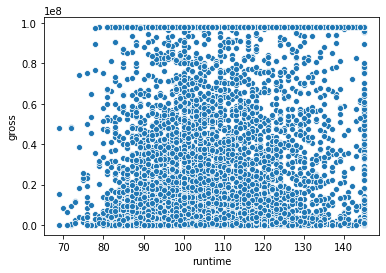

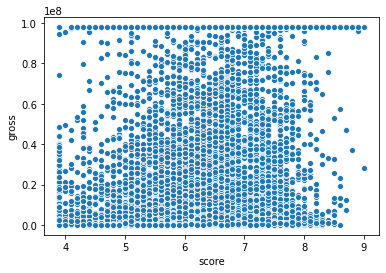

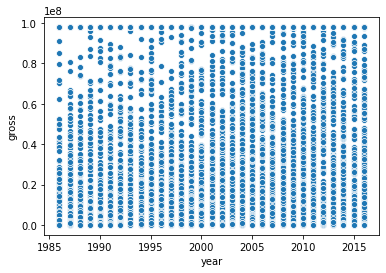

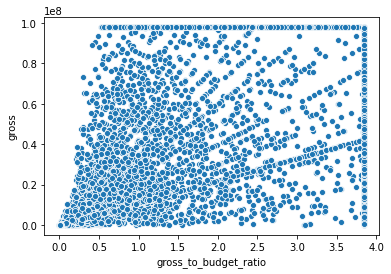

In [166]:
for i in num_col:
    sns.scatterplot(data=movies_ds, x= i, y='gross')
    plt.show()

# V. Modelling - Revenue Prediction

## Prediction with Linear Regression

### Linear Regression Model with gross

In [167]:
y = onehot_dt.gross.to_numpy()
X = onehot_dt.drop(columns = 'gross').to_numpy()

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [169]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [170]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 1.04931128e+00  6.64606067e+04  2.33071302e+06  8.16325382e+04
  1.51692585e+07 -2.79641761e+06 -6.35182485e-04  4.83686230e+06
  3.36270433e+06  8.24550785e+06 -2.29810735e+06 -4.38163708e+06
  1.98150186e+06 -1.16288940e+06 -5.31347654e+06 -9.31022826e+06
  3.31871307e+06 -1.46191508e+07  3.60064798e+06  9.05894316e+05
  3.76875192e+06  2.86195117e+05  1.26819931e+06  2.77386583e+06
  1.11004934e+06  2.32433613e+06  4.73936088e-05 -5.69795111e+06
 -3.99831352e+07 -6.97005616e+06 -4.59265109e+05  9.18144785e+06
  2.62563228e+06  2.53608450e-05 -2.28174347e+06 -4.74310946e-06
 -4.53738705e+06 -3.39593920e+06  1.22426930e+06  3.06582167e+06
  4.84763784e+06 -1.83619559e-05 -1.97859481e-05  1.01676567e+07
  3.00549126e+06  9.00085614e+06  5.06605365e+06  4.11669508e+06
 -5.58099172e+06 -5.57396561e-06  7.36450761e+06  1.80686789e+05
  2.39101751e+06  1.90375427e+06  2.52913355e+05  3.31808069e+05
  1.25471566e+06  1.51257656e+06  2.89633443e+06  6.15270780e+05
 

[Fazit:](ufd0)

- The gap between R-squared score (training) and R-squared score (test) is 0.004 in linear Regression Model with gross.

In [171]:
#onehot_dt

In [172]:
y_pred = linreg.predict(X_test)
y_pred

array([52143226.85794482, -6946647.8201299 , 49554438.46378976, ...,
        1897632.35402149, 55070375.04568544, -6874767.20778665])

In [173]:
df_ts = pd.DataFrame({'year':pd.DataFrame(X_test)[3],'score':pd.DataFrame(X_test)[1], 'runtime':pd.DataFrame(X_test)[2], 'budget': pd.DataFrame(X_test)[0], 'tst':y_test,'pred':y_pred})
df_ts

,year,score,runtime,budget,tst,pred
0,1987.0,118.0,6.5,22000000.0,63766510.0,5.214323e+07
1,1998.0,114.0,6.1,11000000.0,163810.0,-6.946648e+06
2,1998.0,99.0,6.0,60000000.0,14567883.0,4.955444e+07
3,2014.0,112.0,6.6,44000000.0,6105175.0,3.540350e+07
4,1998.0,139.0,5.3,63000000.0,97822171.0,6.900141e+07
...,...,...,...,...,...,...
2041,2005.0,128.0,6.4,63000000.0,72708161.0,6.642303e+07
2042,1996.0,135.0,8.0,890000.0,24475416.0,4.755973e+07
2043,1990.0,105.0,7.6,11000000.0,1710856.0,1.897632e+06
2044,2001.0,114.0,5.9,40000000.0,70836296.0,5.507038e+07


In [174]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8189093028336801

In [175]:
predictions = linreg.predict(X_test)

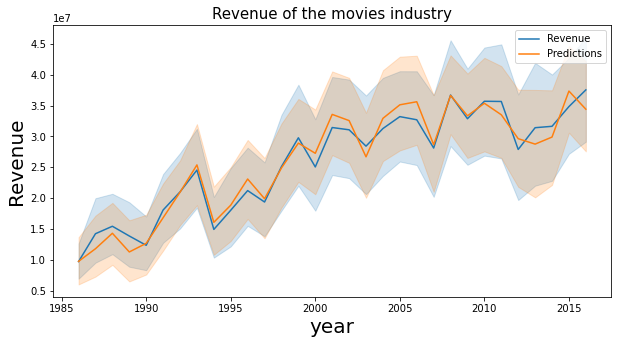

In [176]:
plt.figure(figsize=(10, 5))

sns.lineplot(df_ts['year'], df_ts['tst']) 

sns.lineplot(df_ts['year'], df_ts['pred'])

plt.title("Revenue of the movies industry", size=15)
plt.xlabel('year', size=20)
plt.ylabel('Revenue', size=20)
plt.legend(['Revenue', 'Predictions'])
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

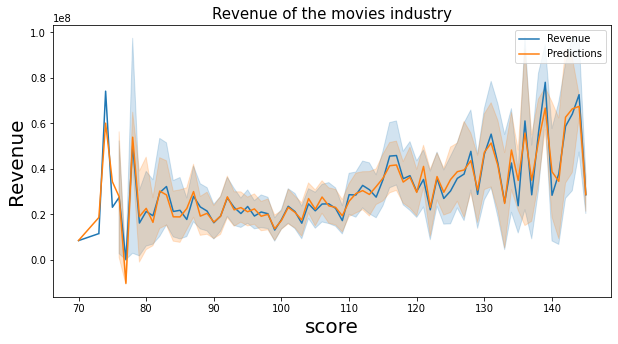

In [177]:
plt.figure(figsize=(10, 5))
   
sns.lineplot(df_ts['score'], df_ts['tst']) 
sns.lineplot(df_ts['score'], df_ts['pred'])

plt.title("Revenue of the movies industry", size=15)
plt.xlabel('score', size=20)
plt.ylabel('Revenue', size=20)
plt.legend(['Revenue', 'Predictions'])
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

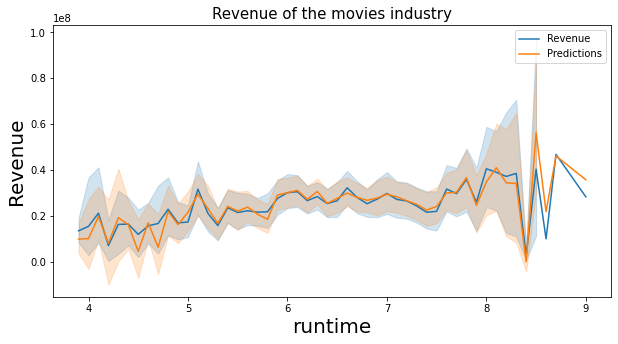

In [178]:
plt.figure(figsize=(10, 5))

sns.lineplot(df_ts['runtime'],df_ts['tst']) 

sns.lineplot(df_ts['runtime'], df_ts['pred'])

plt.title("Revenue of the movies industry", size=15)
plt.xlabel('runtime', size=20)
plt.ylabel('Revenue', size=20)
plt.legend(['Revenue', 'Predictions'])
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

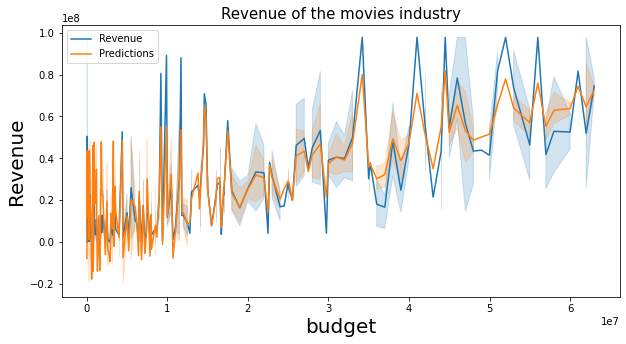

In [179]:
plt.figure(figsize=(10, 5))

sns.lineplot(df_ts['budget'],df_ts['tst']) 

sns.lineplot(df_ts['budget'], df_ts['pred'])

plt.title("Revenue of the movies industry", size=15)
plt.xlabel('budget', size=20)
plt.ylabel('Revenue', size=20)
plt.legend(['Revenue', 'Predictions'])
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

[Fazit:](ufd0)

- Model reached 81.89%.

- Prediction is quite close to reality.

In [183]:
import pickle
#Save model
path = '/Users/dinhngocmai/Documents/Python Kurs/Final Projekt Movie Industry'
filename = 'linreg.p'
pickle.dump(linreg, open(path + filename, 'wb'))
 
#Load model
linreg = pickle.load(open(path + filename, 'rb')) 